# House Price Prediction Using XGBoost

## Project Overview
Machine learning model to predict house prices using the Boston Housing Dataset and XGBoost regressor.

## Dataset Features
| Feature | Description |
|---------|------------|
| CRIM | Per capita crime rate by town |
| ZN | Proportion of residential land zoned for large lots |
| INDUS | Proportion of non-retail business acres |
| CHAS | Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
| NOX | Nitric oxides concentration (parts per 10 million) |
| RM | Average number of rooms per dwelling |
| AGE | Proportion of owner-occupied units built prior to 1940 |
| DIS | Weighted distances to employment centers |
| RAD | Index of accessibility to radial highways |
| TAX | Property-tax rate per $10,000 |
| PTRATIO | Pupil-teacher ratio by town |
| B | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks |
| LSTAT | % lower status of the population |

## Methodology
1. Data Analysis
   - Feature exploration
   - Correlation analysis
   - Statistical summary

2. Model Development
   - XGBoost Regressor
   - Train-test split (80-20)
   - Performance metrics

## Expected Outcome
Accurate prediction of house prices based on various environmental and social factors.

In [1]:
# Importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

## Dependencies

Key libraries:
- **pandas, numpy**: Data manipulation and numerical operations
- **matplotlib, seaborn**: Data visualization
- **sklearn**: Machine learning tools and metrics
- **xgboost**: Advanced gradient boosting model

In [2]:
# loading the dataset

df = pd.read_csv('House.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Data Loading and Initial Processing

Loading the Boston Housing dataset:
- CSV format with housing features
- Target variable: House prices (MEDV/PRICE)
- Initial preview of data structure

In [5]:
df = df.rename(columns={"MEDV":"PRICE"})
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
df.shape

(506, 14)

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Exploratory Data Analysis

Statistical analysis includes:
- Dataset dimensions
- Summary statistics (mean, std, quartiles)
- Missing value detection
- Feature correlations with price

Key visualizations:
- Correlation heatmap
- Distribution of key features

In [8]:
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [13]:
correlation = df.corr()

<Axes: >

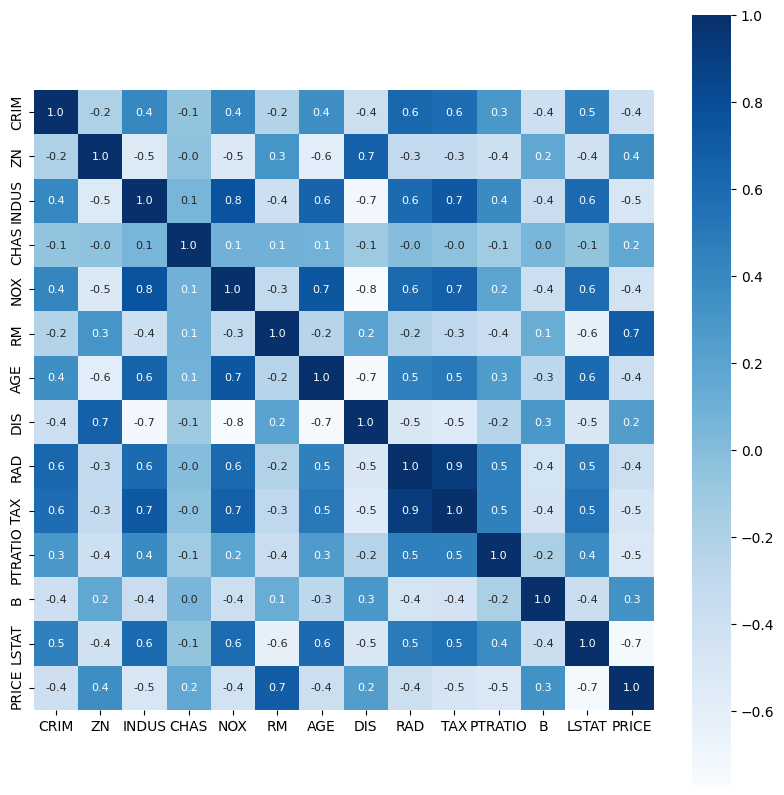

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [24]:
X = df.drop(['PRICE'], axis=1)
Y = df['PRICE']

## Model Preparation

Data splitting strategy:
- Features (X): All columns except PRICE
- Target (Y): House PRICE
- Train-test split: 80% training, 20% testing
- Random state: 30 for reproducibility

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=30)

In [78]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


In [79]:
model = XGBRegressor()

## Model Training and Evaluation

XGBoost Regressor:
- Advanced gradient boosting
- Handles non-linear relationships
- High predictive accuracy

Performance Metrics:
- R-squared score
- Mean Absolute Error
- Visualization of actual vs predicted prices

In [80]:
model.fit(X_train, Y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [81]:
x_train_pred = model.predict(X_train)

In [82]:
score_1 = metrics.r2_score(Y_train, x_train_pred)
print("R Square error : ",score_1)
score_2 = metrics.mean_absolute_error(Y_train, x_train_pred)
print("Mean Absolute error : ", score_2)


R Square error :  0.9999934045349113
Mean Absolute error :  0.016431982210367086


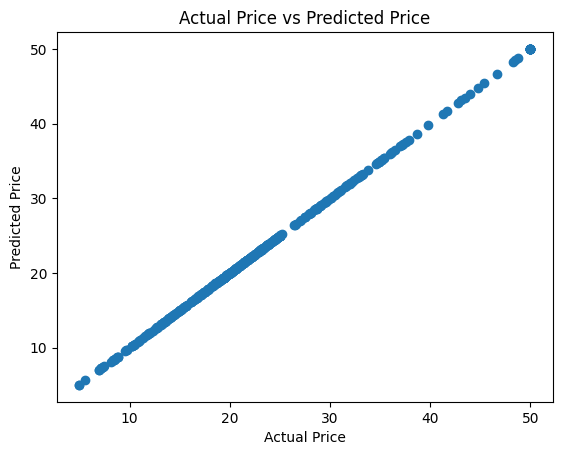

In [83]:
plt.scatter(Y_train, x_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [84]:
x_test_pred = model.predict(X_test)

In [85]:
score_3 = metrics.r2_score(Y_test, x_test_pred)
print("R squared error : ",score_3)

score_4 = metrics.mean_absolute_error(Y_test, x_test_pred)
print("Mean absolute error : ",score_4)

R squared error :  0.8897628422133311
Mean absolute error :  1.950168779784558


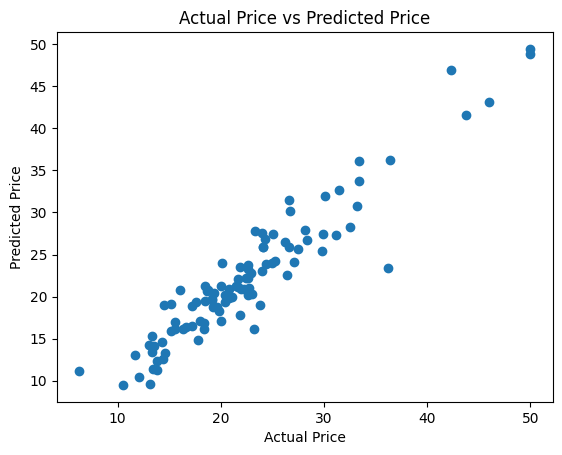

In [86]:
plt.scatter(Y_test, x_test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()


In [91]:
input_data = (0.02763,75.00,2.950,0,0.4280,6.5950,21.80,5.4011,3,252.0,18.30,395.63,4.32)
input_data_as_np_arr = np.asarray(input_data)


input_data_reshaped = input_data_as_np_arr.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print("The price of the house is : ",prediction)



The price of the house is :  [30.793316]


## Prediction System

Making predictions:
1. Input: 13 house features
2. Process: Data reshaping and model prediction
3. Output: Estimated house price

Example features required:
- Crime rate
- Zoning
- Industrial proportion
- Environmental factors
- Structural characteristics